# 06 - Create Baseline Model

This notebook focuses on developing a baseline machine learning model to predict `GoodFit`. The goal is to establish a reference point for future model improvements.

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import sys
sys.path.append('/path/to/bias-fairness-mvp/src')
from training_utils import save_experiment_metadata

In [23]:
# Display all rows and columns
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.max_rows', None)      # Show all rows
pd.set_option('display.max_columns', None)   # Show all columns

In [24]:
path = "../data/processed/"

In [25]:
# Read the datasets from parquet format
X_train = pd.read_parquet(f"{path}X_train.parquet")
X_test = pd.read_parquet(f"{path}X_test.parquet")
y_train = pd.read_parquet(f"{path}y_train.parquet").squeeze()
y_test = pd.read_parquet(f"{path}y_test.parquet").squeeze()

In [26]:
# Initialize and train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
logistic_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [27]:
# Predict on test data
y_pred = logistic_model.predict(X_test)

In [28]:
# Generate classification report
report = classification_report(y_test, y_pred)

# Display the report in a structured format
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.72      0.40        57
           1       0.90      0.58      0.71       256

    accuracy                           0.61       313
   macro avg       0.59      0.65      0.55       313
weighted avg       0.79      0.61      0.65       313



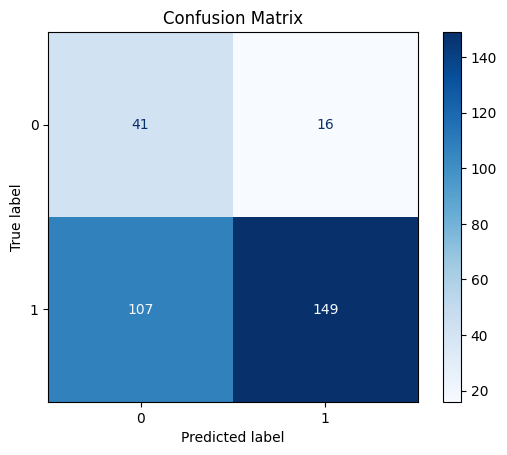

In [29]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix")
plt.show()

**Confusion Matrix with `class_weight='balanced'`**
The confusion matrix below shows improved sensitivity to the minority class (GoodFit = 0) after applying class balancing, but misclassifications still exist.

In [30]:
# Model and experiment details
model_name = "Logistic Regression"
parameters = {"max_iter": 1000, "class_weight": "balanced"}
comments = ""

# Save experiment metadata
file_path = "../models/experiment_tracker.csv"
save_experiment_metadata(file_path, model_name, parameters, comments, y_test, y_pred)